# Project Proposal

# Introduction

In this report, we will be analyzing a dataset representing the Milwaukee real estate data from 2002-2018. The data source is from a credible source (Milwaukee govt website) and is more than large enough size for data analysis. For our question, we will look at Residential versus Commercial properties and analyze their differences in terms of price per square foot. So, our response variable will be price per square foot, a column we will create ourselves via cleaning, and the explanatory variable will be property type, or PropType. Our location parameter will be difference mean price per square foot between Residential and Commercial, and our scale parameter will be the standard deviation.

# Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
housing_data <- read.csv("https://raw.githubusercontent.com/mhuang306/STAT-201-proj/main/2002-2018-property-sales-data%5B1%5D.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




Here, we're importing any libraries that might be necessary for this assignment and reading the csv file off of our group's Github repository

In [2]:
head(housing_data)

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,Commercial,3230461110,2628 N 6TH ST,,6,6258,Commercial Exempt,,2,1880,0,1840,1,0,0,0,12750,2002-01,15900
2,Commercial,3590192000,1363 N PROSPECT AV,,3,6262,Mansions With Commercial Usage,,2,1876,0,6377,1,0,0,0,11840,2002-01,850000
3,Commercial,4161194000,617 S 94TH ST,,10,6272,Service Building,,1,1954,0,5022,1,0,0,0,9700,2002-01,119000
4,Commercial,1719836000,3624 W SILVER SPRING DR,,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1955,0,6420,1,0,0,0,8792,2002-01,210000
5,Commercial,3480290000,3830 W LISBON AV,,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1909,0,5956,1,0,0,0,4840,2002-01,48500
6,Commercial,4069983200,320 N 76TH ST,,10,6272,Strip Shopping Center,,1,1954,0,14200,1,0,0,0,16696,2002-01,885000


Here we do the cleaning for the data, removing NA values and zeroes, correcting column types, and stripping it down to just our potential variables of interest

In [7]:
housing_data <- housing_data |>
    mutate(PropType = as.factor(PropType)) |>
    select(PropType, Fin_sqft, Sale_price) |>
    filter(!is.na(PropType))|>
    filter(PropType == c("Residential", "Commercial")) |>
    filter(Fin_sqft != 0, Sale_price != 0) 

tail(housing_data)

Warning message:
“There were 2 warnings in `filter()`.
The first warning was:
ℹ In argument: `PropType == c("Residential", "Commercial")`.
Caused by warning in `==.default`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


,PropType,Fin_sqft,Sale_price
,<fct>,<int>,<int>
6819,Residential,1609,205000
6820,Residential,1467,229900
6821,Residential,768,47500
6822,Residential,1642,60000
6823,Commercial,150000,10810000
6824,Commercial,4254,1610000


Here is a selection of graphs representing our variables of interest, starting with a brief visualization of the ratio of Commercial vs Residential properties in this dataset

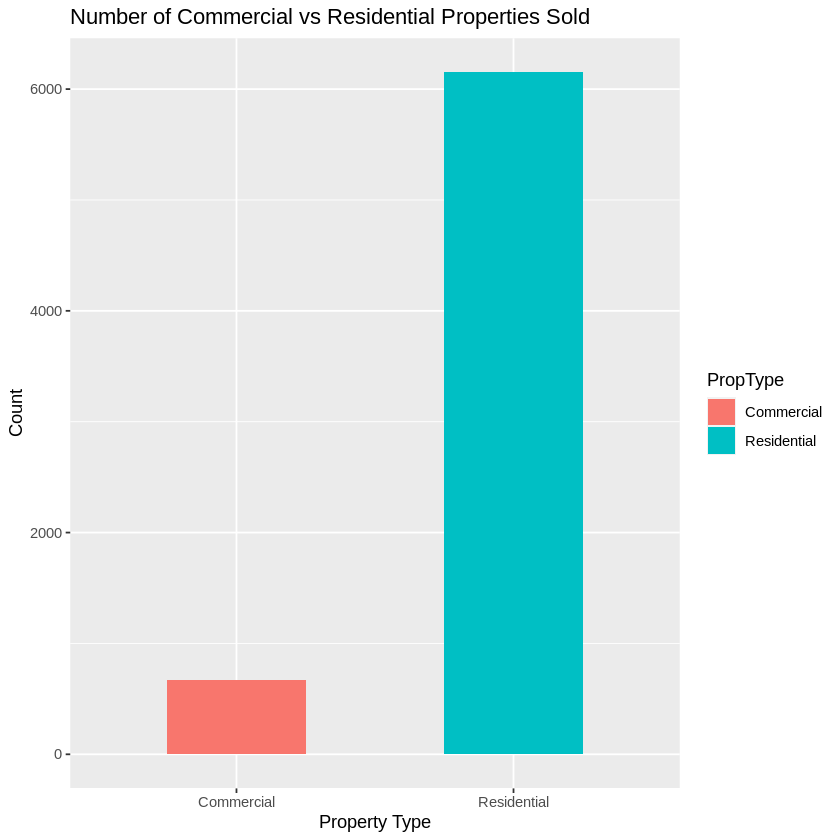

In [8]:
prop_type_bar <- housing_data |>
    ggplot(aes(x = PropType, fill = PropType)) +
    geom_bar(stat = "count", width = 0.5) +
    labs(x = "Property Type", y = "Count") +
    ggtitle("Number of Commercial vs Residential Properties Sold")

prop_type_bar

Here we create the price per square feet variable and calculate our summary statistics along with the proportion of each type of property

In [18]:
housing_data <- housing_data |>
    mutate(Price_per_sqft = Sale_price/Fin_sqft)

housing_summary <- housing_data |>
    group_by(PropType) |>
    summarise(mean = mean(Price_per_sqft),
             sd = sd(Price_per_sqft),
             prop = round(n()/nrow(housing_data), digits = 3))

housing_summary

PropType,mean,sd,prop
<fct>,<dbl>,<dbl>,<dbl>
Commercial,304.9606,4987.5223,0.099
Residential,95.9904,40.5902,0.901


Finally, we graph histograms of the distribution of price per square foot for each type of property

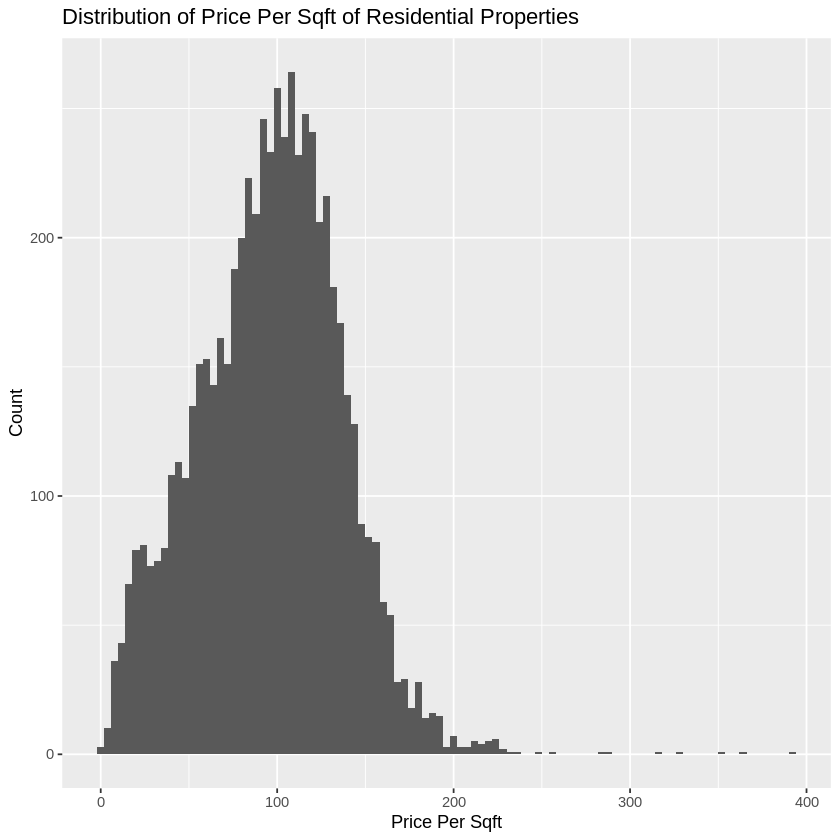

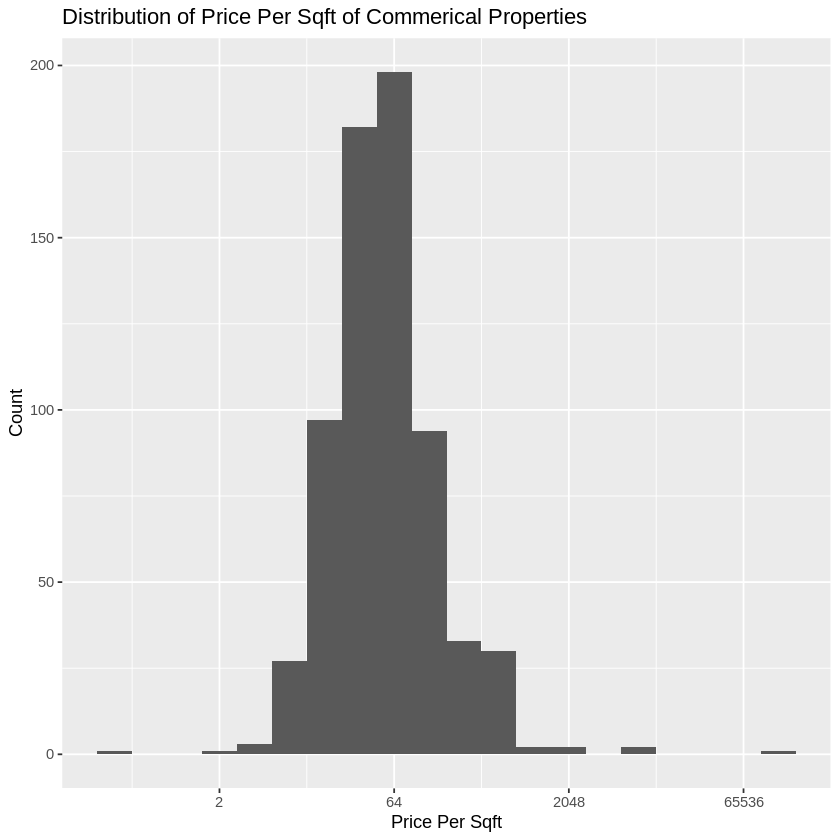

In [27]:
Residential_data <- housing_data |>
    filter(PropType == "Residential")

Commercial_data <- housing_data |>
    filter(PropType == "Commercial")

Res_price_per_sqft_dist <- Residential_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 4) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Residential Properties")

Com_price_per_sqft_dist <- Commerical_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 1) +
    scale_x_continuous(trans = "log2") +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Commerical Properties")

# NOTE: Commerical Data Frame is size only 40 and has a significant outlier, hence the logarithmic scale

Res_price_per_sqft_dist
Com_price_per_sqft_dist

# Methods: Plan

Through our analysis, we expect to find whether commercial and residential buildings have a similar price per square foot and if they do not, what are the factors that cause these differences. These findings could help people such as our stakeholders with real estate investment, urban planning and property valuation. Additional questions we may have could be about external variables, such as whether market conditions, temporal trends, or governmental regulations also affected these differences in prices. 

# References

Clark, Stephen and Lomax, Nik. "Rent/price ratio for English housing sub-markets using matched sales and rental data." *Area*, vol. 52, no. 1, 2020

Gougeon, Annik and Moussouni, Oualid. "Residential real estate sales in 2018: Characteristics of properties sold." *Statistics Canada*, 11 August 2021, https://publications.gc.ca/collections/collection_2021/statcan/46-28-0001/CS462-80001-2021-1-eng.pdf.

https://doi.org/10.1111/area.12555